## Lecture Notes

## Excecises

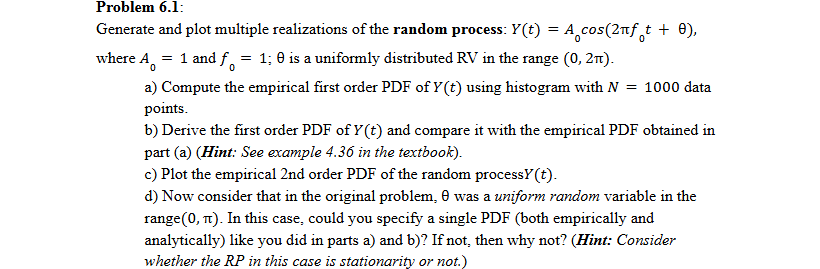

Since the process is strict sense stationary so we can choose any time t to compute the PDF, since the PDF does not depend on t.

We choose $t=0$, this reduces the expression to $y(t)=cos(\theta)$ where $0 \leq \theta \leq 2\pi$.

We know from the book that is transformation has the Arcsine PDF.

$f_y=\frac{1}{\pi \sqrt{1-y^2}}$

Ts: 0.001001001001001001


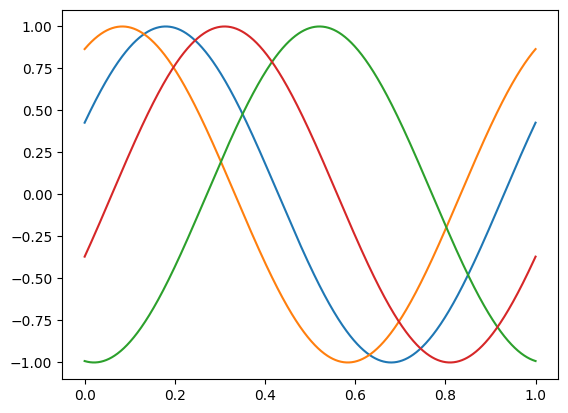

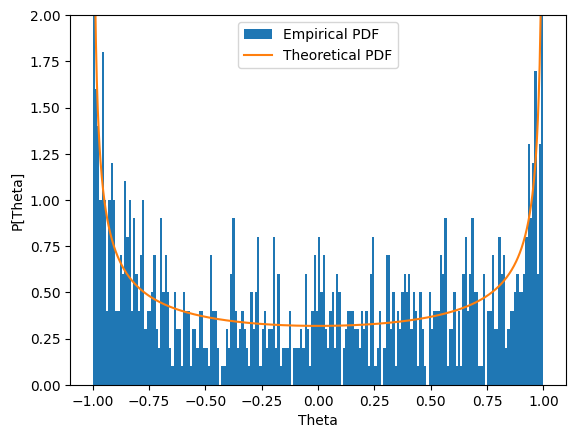

In [44]:

# A + B

import numpy as np
import matplotlib.pyplot as plt
import random


# Theoretical PDF

y_theoretical = np.linspace(-0.999, 0.999, 1000)
f_y = 1/(np.pi*np.sqrt(1-y_theoretical**2))

# Empirical PDF

A_0 = 1
f_0 = 1
N = 1000

t = np.linspace(0, 1, 1000)
Ts = t[1]-t[0]
print(f"Ts: {Ts}")

plt.figure()
for i in range(4):

    theta = random.uniform(0, 2*np.pi)
    y_temp = A_0 * np.cos(2*np.pi*f_0*t+theta)
    plt.plot(t, y_temp)

theta_t = np.random.uniform(0, 2*np.pi, size=N)
y_t = np.cos(theta_t)

plt.figure()
plt.hist(y_t, bins=200, density=True, label="Empirical PDF")
plt.plot(y_theoretical, f_y, label="Theoretical PDF")
plt.ylim(0, 2)
plt.xlabel("Theta")
plt.ylabel("P[Theta]")
plt.legend()

### C)

The original process is stationary.

#### Stationarity

All the distributions are invariant under time shift, such that $(X(t_1),..,X(t_n)$ are identical to $(X(t_1+\tau),..,X(t_n+\tau)$

### Wide Sense stationarity

Following properties needs to be satisfied

Constant Mean(Indenpent of time): $\mu_x=\mathbb{E}[X(t)]=\mathbb{E}[X(t+\tau)]$

Autocorrelation(Autocovariance) depends only on time lag: $\mathbb{E}[X(t_n)X(t_k)]=\mathbb{E}[X(t_n)X(t_{n-k})]$

Finite second moment exists: $\mathbb{E}[X(t)^2] < \infty$

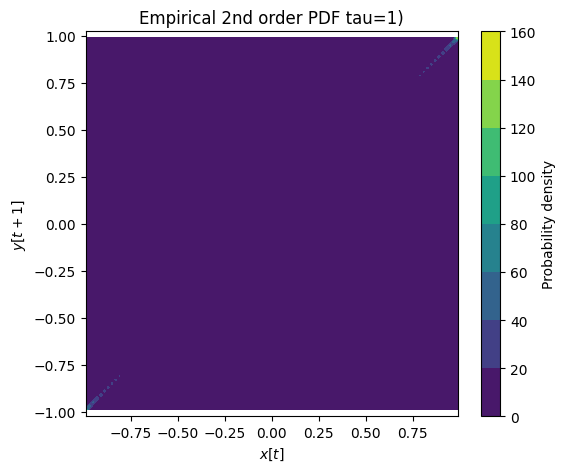

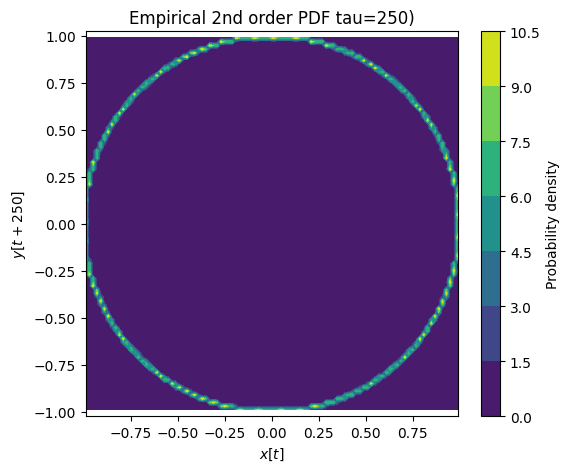

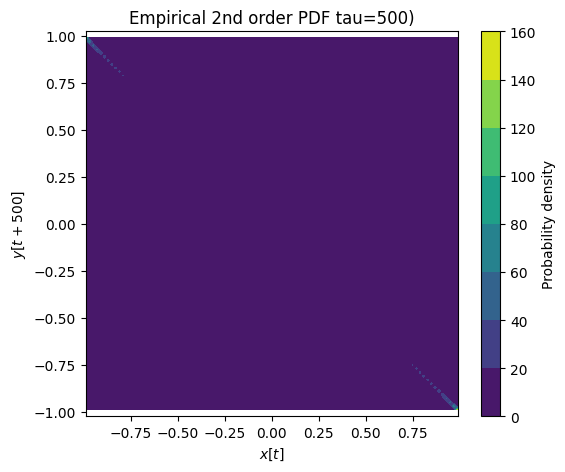

In [49]:
taus= [1, 250, 500]

for tau in taus:
    
    #y_1 = y_t[:-tau]
    #y_2 = y_t[tau:]

    theta = random.uniform(0, 2*np.pi)
    y_1 = A_0 * np.cos(2*np.pi*f_0*(t)+theta)
    y_2 = A_0 * np.cos(2*np.pi*f_0*(t+tau*Ts)+theta)
    
    pdf2d, xedges, yedges = np.histogram2d(y_1, y_2, bins=100, density=True)
    xc = 0.5 * (xedges[:-1] + xedges[1:])
    yc = 0.5 * (yedges[:-1] + yedges[1:])
    
    # --- Plot the empirical 2D PDF ---
    plt.figure(figsize=(6,5))
    plt.contourf(xc, yc, pdf2d.T, cmap='viridis')
    plt.xlabel('$x[t]$')
    plt.ylabel(f'$y[t+{tau}]$')
    plt.title(f"Empirical 2nd order PDF tau={tau})")
    plt.colorbar(label='Probability density')
    plt.axis('equal')
    plt.show()

### D)

Text(0, 0.5, 'Amplitude')

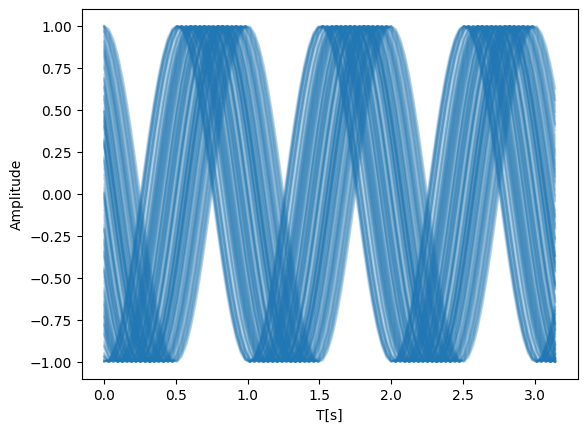

In [50]:
A_0 = 1
f_0 = 1
N = 1000

t = np.linspace(0, np.pi, 100)

plt.figure()
for i in range(400):

    theta = random.uniform(0, np.pi)
    y_temp = A_0 * np.cos(2*np.pi*f_0*t+theta)
    plt.plot(t, y_temp, color="C0", alpha=0.1)

plt.xlabel("T[s]")
plt.ylabel("Amplitude")

Above it is seen how the PDF depends on t, hence the process is not stationary and we cannot derive the same expressions as in A and B

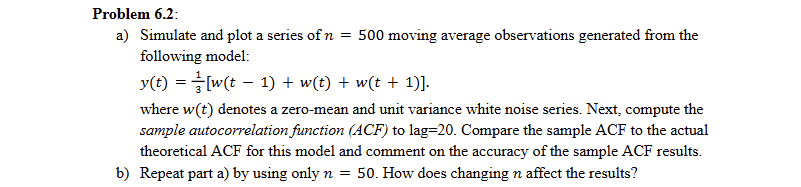

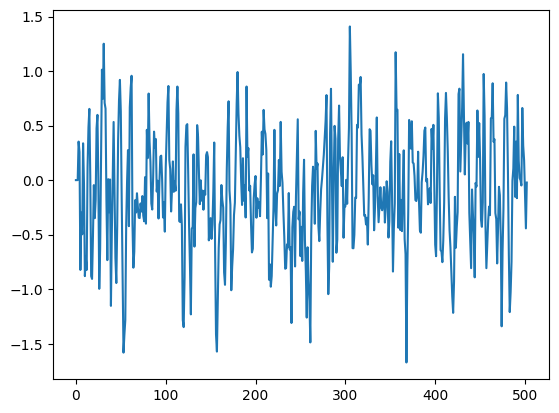

In [3]:
# A

mean = 0
std_dev = 1
ma_order = 3
N = 500 + ma_order

w = np.random.normal(loc=mean, scale=std_dev, size=N)
y = np.zeros(N)

for i in range(ma_order, N):

    y[i] = 1/3*(w[i-2]+w[i-1]+w[i])

plt.figure()
plt.plot(y)

### Theoretical autocorrelation

The theoretical autoccovariance for the process $y(t)=\frac{1}{3}(w(t+1)+w(t)+w(t-1))$ can be calculated as 

$\mathbb{E}[X(n)X_(k)]=\frac{1}{3^2}(\mathbb{E}[(w(t_1+1)+w(t_1)+w(t_1-1))(w(t_2+1)+w(t_2)+w(t_2-1))]$

When $t_1=t_2$

$\mathbb{E}[X(t_1)X_(t_2)]=\frac{1}{3}\sigma^2_w$

When $t_1=t_2-1$

$\mathbb{E}[X(t_1)X_(t_2)]=\frac{2}{9}\sigma^2_w$

When $t_1=t_2-2$

$\mathbb{E}[X(t_1)X_(t_2)]=\frac{1}{9}\sigma^2_w$

For all other values the covariance is $0$.

Since the autoccovariance is symmetrical, we also have the values for $t_1=t_2+1$ and $t_1=t_2+2$

The autocorrelation can be found by normalizing by $R_x(0)$

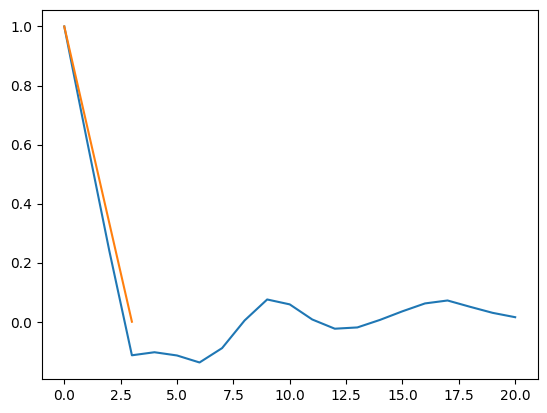

In [8]:
import statsmodels.api as sm

# Theoretical
lags = [0, 1, 2, 3]
acov_theoretical = [1/3, 2/9, 1/9, 0]
acorr_theoretical = [a/acov_theoretical[0] for a in acov_theoretical]


nlags = 20

acorr = sm.tsa.acf(y, nlags=nlags)

plt.figure()
plt.plot(acorr)
plt.plot(lags, acorr_theoretical)

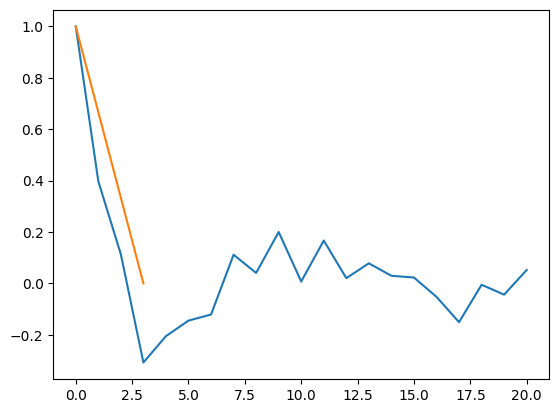

In [15]:
# B

N = 50 + ma_order

nlags = 20

acorr = sm.tsa.acf(y, nlags=nlags)

plt.figure()
plt.plot(acorr)
plt.plot(lags, acorr_theoretical)

When $N$ is small, the correlation is moving away from the theoretical values.

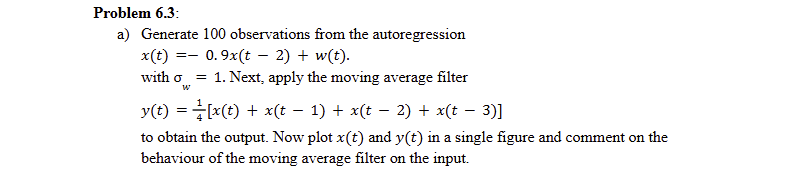

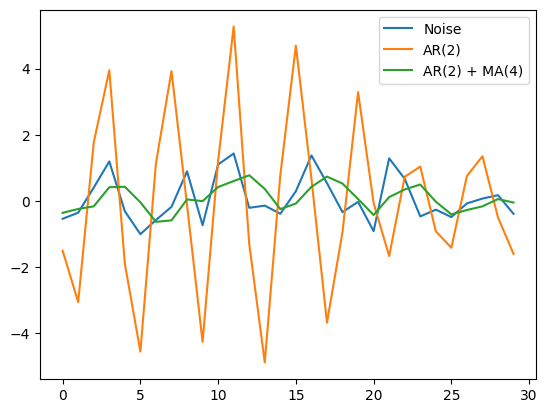

In [25]:
mean = 0
std_dev = 1
ma_order = 4
ar_order = 2
N = 500 + ma_order

w = np.random.normal(loc=mean, scale=std_dev, size=N)
x = np.zeros(N)
y = np.zeros(N)

for i in range(ar_order, N):
    x[i]= -0.9*x[i-2] + w[i]

for i in range(ma_order, N):

    y[i] = 1/3*(x[i-3]+x[i-2]+x[i-1]+x[i])

for i in range(ma_order, N):

    y[i] = 1/3*(w[i-2]+w[i-1]+w[i])

plt.figure()
plt.plot(w[20:50], label="Noise")
plt.plot(x[20:50], label="AR(2)")
plt.plot(y[20:50], label="AR(2) + MA(4)")
plt.legend()

The AR process introduces oscillations to the process, the moving average dampens this.